# Google Drive 마운트 하기





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#경로 설정
import os
os.chdir('/content/drive/My Drive/')

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/MyDrive/data/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [5]:
pip install konlpy

# 키워드 추출

텍스트 데이터 전처리

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/book_data_사회.csv', encoding='cp949')
df.head()

,id,title,intro
0,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...
1,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...
2,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독..."
3,16032847_9791187861232,해병대전우 70년사 12권 세트,"70년 전, 해병대가 탄생한 이래, 두 번의 전쟁을 경험한 대한민국 해병대는 세계 ..."
4,16109125_9791187232162,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,‘국민의 건강 농촌의 희망 지구의 행복’을 향한 배옥병의 삶과 길친환경 무상급식의 ...


In [7]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
# ‘id’ 피처에 이를 적용합니다.
df['ko_id'] = df['id'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id
0,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,
1,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,
2,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",
3,16032847_9791187861232,해병대전우 70년사 12권 세트,"70년 전, 해병대가 탄생한 이래, 두 번의 전쟁을 경험한 대한민국 해병대는 세계 ...",
4,16109125_9791187232162,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,‘국민의 건강 농촌의 희망 지구의 행복’을 향한 배옥병의 삶과 길친환경 무상급식의 ...,


In [9]:
# ‘title’ 피처에 이를 적용합니다.
df['ko_title'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title
0,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,,인간행동과 사회환경
1,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,,평화사상과 통일의 길
2,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",,프리드리히키틀러큰글씨책이론총서
3,16032847_9791187861232,해병대전우 70년사 12권 세트,"70년 전, 해병대가 탄생한 이래, 두 번의 전쟁을 경험한 대한민국 해병대는 세계 ...",,해병대전우 년사 권 세트
4,16109125_9791187232162,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,‘국민의 건강 농촌의 희망 지구의 행복’을 향한 배옥병의 삶과 길친환경 무상급식의 ...,,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다


In [10]:
# ‘intro’ 피처에 이를 적용합니다.
df['ko_intro'] = df['intro'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title,ko_intro
0,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,,인간행동과 사회환경,이 책은 인간행동과 사회환경을 다룬 이론서입니다 인간행동과 사회환경의 기초적이고 ...
1,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,,평화사상과 통일의 길,평화사상과 통일의 길은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명한다...
2,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",,프리드리히키틀러큰글씨책이론총서,프리드리히 키틀러큰글씨책 은 기록체계 정보 저장의 네트워크 문자 독점 시대 축음기와...
3,16032847_9791187861232,해병대전우 70년사 12권 세트,"70년 전, 해병대가 탄생한 이래, 두 번의 전쟁을 경험한 대한민국 해병대는 세계 ...",,해병대전우 년사 권 세트,년 전 해병대가 탄생한 이래 두 번의 전쟁을 경험한 대한민국 해병대는 세계 속의 최...
4,16109125_9791187232162,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,‘국민의 건강 농촌의 희망 지구의 행복’을 향한 배옥병의 삶과 길친환경 무상급식의 ...,,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,국민의 건강 농촌의 희망 지구의 행복을 향한 배옥병의 삶과 길친환경 무상급식의 아이...


In [11]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전
korean_stopwords_path = "/content/drive/MyDrive/data/stopword.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [12]:
df['nouns'] = df['ko_intro'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(3171, 7)


,id,title,intro,ko_id,ko_title,ko_intro,nouns
0,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,,인간행동과 사회환경,이 책은 인간행동과 사회환경을 다룬 이론서입니다 인간행동과 사회환경의 기초적이고 ...,"[인간, 행동, 사회, 환경, 이론, 인간, 행동, 사회, 환경, 학습]"
1,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,,평화사상과 통일의 길,평화사상과 통일의 길은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명한다...,"[평화, 사상, 통일, 평화, 사상, 바탕, 한반도, 통일, 설명, 그리스도교, 유..."
2,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",,프리드리히키틀러큰글씨책이론총서,프리드리히 키틀러큰글씨책 은 기록체계 정보 저장의 네트워크 문자 독점 시대 축음기와...,"[프리드리히, 키틀러, 글씨, 기록, 체계, 정보, 저장, 네트워크, 문자, 독점,..."
3,16032847_9791187861232,해병대전우 70년사 12권 세트,"70년 전, 해병대가 탄생한 이래, 두 번의 전쟁을 경험한 대한민국 해병대는 세계 ...",,해병대전우 년사 권 세트,년 전 해병대가 탄생한 이래 두 번의 전쟁을 경험한 대한민국 해병대는 세계 속의 최...,"[해병대, 탄생, 번의, 전쟁, 경험, 대한민국, 해병대, 세계, 최강, 해병대, ..."
4,16109125_9791187232162,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,‘국민의 건강 농촌의 희망 지구의 행복’을 향한 배옥병의 삶과 길친환경 무상급식의 ...,,배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다,국민의 건강 농촌의 희망 지구의 행복을 향한 배옥병의 삶과 길친환경 무상급식의 아이...,"[국민, 건강, 농촌, 희망, 지구, 행복, 배옥병, 친환경, 무상급식, 아이콘, ..."


# 연관 분석을 이용한 키워드 분석

연관 키워드 추출

In [13]:
pip install apyori

In [14]:
from apyori import apriori

# 지지도 (supprot): P(A∩B)
result=(list(apriori(df['nouns'], min_support=0.03)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))

# 두 단어의 연관성을 나타내며 0.03 지지도 이상 추출
df = df[(df['length'] == 2) &
        (df['support'] >= 0.03)].sort_values(by='support', ascending=False)

df.head(10)

,items,support,ordered_statistics,length
391,"(사람, 사회)",0.083570,"[((), (사람, 사회), 0.08356985178177231, 1.0), ((사...",2
418,"(정치, 사회)",0.082939,"[((), (정치, 사회), 0.08293913591926837, 1.0), ((사...",2
400,"(세계, 사회)",0.081993,"[((), (세계, 사회), 0.08199306212551245, 1.0), ((사...",2
406,"(연구, 사회)",0.075371,"[((), (연구, 사회), 0.07537054556922107, 1.0), ((사...",2
373,"(변화, 사회)",0.074424,"[((), (변화, 사회), 0.07442447177546516, 1.0), ((변...",2
335,"(국가, 사회)",0.073478,"[((), (국가, 사회), 0.07347839798170924, 1.0), ((국...",2
301,"(경제, 사회)",0.072217,"[((), (경제, 사회), 0.07221696625670136, 1.0), ((경...",2
317,"(사회, 과정)",0.070956,"[((), (과정, 사회), 0.07095553453169347, 1.0), ((과...",2
404,"(역사, 사회)",0.070640,"[((), (역사, 사회), 0.0706401766004415, 1.0), ((사회...",2
380,"(분석, 사회)",0.066856,"[((), (분석, 사회), 0.06685588142541785, 1.0), ((분...",2


In [15]:
pip install networkx

In [16]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# networkx 그래프 정의
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [18]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [19]:
# 레이아웃
pos = nx.spring_layout(G)
# pos = nx.dodecahedral_layout(G)
# pos = nx.rescale_layout(G)

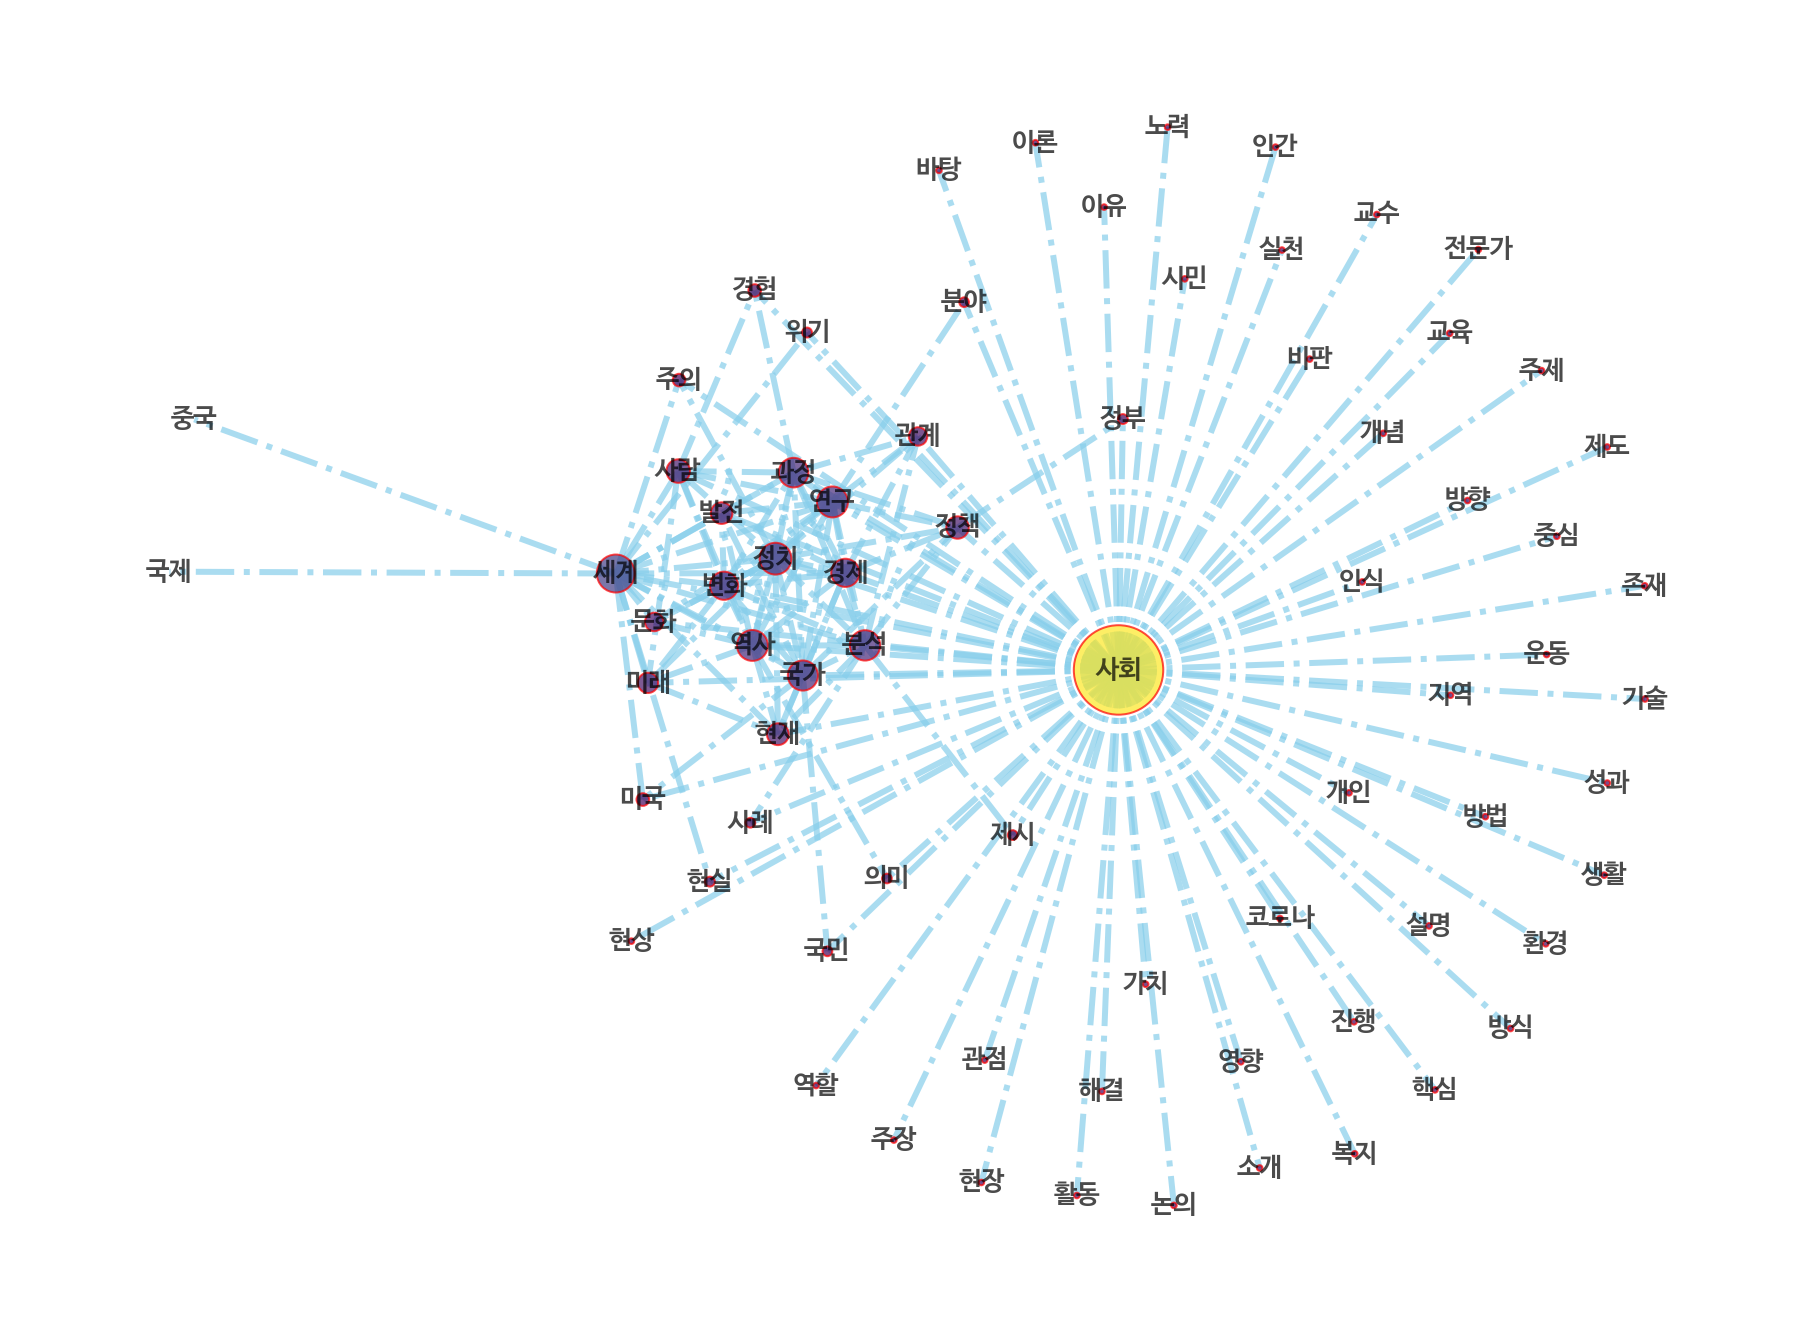

In [20]:
# 네트워크 그래프
plt.figure(figsize = (16, 12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size = 13, font_weight='bold',
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha = 0.7, width = 3, edge_color = 'skyblue', edgecolors='red', style = '-.')